In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
!pip install optuna
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/data.csv')

df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,7.76,17,69.73,49096.383004,0.0,0.00,0.0,0.0,0.0,0.0,...,6030,60,70,60.30,1.714466,60.30,0.000021,100,2.939394,DOS-UDP_FLOOD
1,7.92,17,63.36,17895.315300,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000056,100,0.000000,DDOS-UDP_FLOOD
2,0.00,1,64.00,41169.061641,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000024,100,0.000000,DDOS-ICMP_FLOOD
3,20.00,6,64.00,16675.163996,0.0,0.00,0.0,1.0,1.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000060,100,0.000000,DDOS-PSHACK_FLOOD
4,20.00,6,64.00,29516.565799,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000034,100,0.000000,DOS-TCP_FLOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428156,20.00,6,64.00,33267.005076,0.0,1.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000030,100,0.000000,DDOS-SYN_FLOOD
428157,20.00,6,64.00,8280.792087,0.0,1.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000121,100,0.000000,DDOS-SYN_FLOOD
428158,20.00,6,64.00,31939.567469,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000033,100,0.000000,DDOS-TCP_FLOOD
428159,8.24,17,65.55,3334.661589,0.0,0.01,0.0,0.0,0.0,0.0,...,6075,60,90,60.75,3.934758,60.75,0.000300,100,15.482323,DDOS-UDP_FLOOD


In [ ]:
df.isna().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428161 entries, 0 to 428160
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    428161 non-null  float64
 1   Protocol Type    428161 non-null  int64  
 2   Time_To_Live     428161 non-null  float64
 3   Rate             428161 non-null  float64
 4   fin_flag_number  428161 non-null  float64
 5   syn_flag_number  428161 non-null  float64
 6   rst_flag_number  428161 non-null  float64
 7   psh_flag_number  428161 non-null  float64
 8   ack_flag_number  428161 non-null  float64
 9   ece_flag_number  428161 non-null  float64
 10  cwr_flag_number  428161 non-null  float64
 11  ack_count        428161 non-null  int64  
 12  syn_count        428161 non-null  int64  
 13  fin_count        428161 non-null  int64  
 14  rst_count        428161 non-null  int64  
 15  HTTP             428161 non-null  float64
 16  HTTPS            428161 non-null  floa

In [ ]:
df.describe()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
count,428161.000000,428161.000000,428161.000000,4.281610e+05,428161.00000,428161.000000,428161.000000,428161.000000,428161.000000,428161.000000,...,428161.000000,428161.000000,428161.000000,428161.000000,428161.000000,428155.000000,428161.000000,428161.000000,428161.000000,4.281550e+05
mean,13.737697,9.097188,66.561756,inf,0.08666,0.206395,0.092482,0.094711,0.130992,0.000030,...,0.997148,10976.881928,80.009737,225.574550,131.979733,41.958668,131.979733,0.013040,95.478250,3.551020e+04
std,8.735455,9.115007,14.508691,NaN,0.27898,0.399434,0.282737,0.278227,0.317893,0.001721,...,0.019027,16904.824627,107.935486,593.054785,230.944523,183.711054,230.944523,8.021706,19.622501,4.172281e+05
min,0.000000,0.000000,0.000000,1.905196e-04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,42.000000,54.000000,47.400000,0.000000,47.400000,0.000000,1.000000,0.000000e+00
25%,8.000000,6.000000,64.000000,1.134700e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000027,100.000000,0.000000e+00
50%,20.000000,6.000000,64.000000,2.454675e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000041,100.000000,0.000000e+00
75%,20.000000,17.000000,64.000000,3.787866e+04,0.00000,0.010000,0.000000,0.000000,0.010000,0.000000,...,1.000000,6011.000000,60.000000,74.000000,60.260000,0.951139,60.260000,0.000089,100.000000,9.058081e-01
max,60.000000,47.000000,255.000000,inf,1.00000,1.000000,1.000000,1.000000,1.000000,0.300000,...,1.000000,235549.000000,5858.000000,31922.000000,6011.800000,9730.179418,6011.800000,5248.802429,100.000000,9.467639e+07


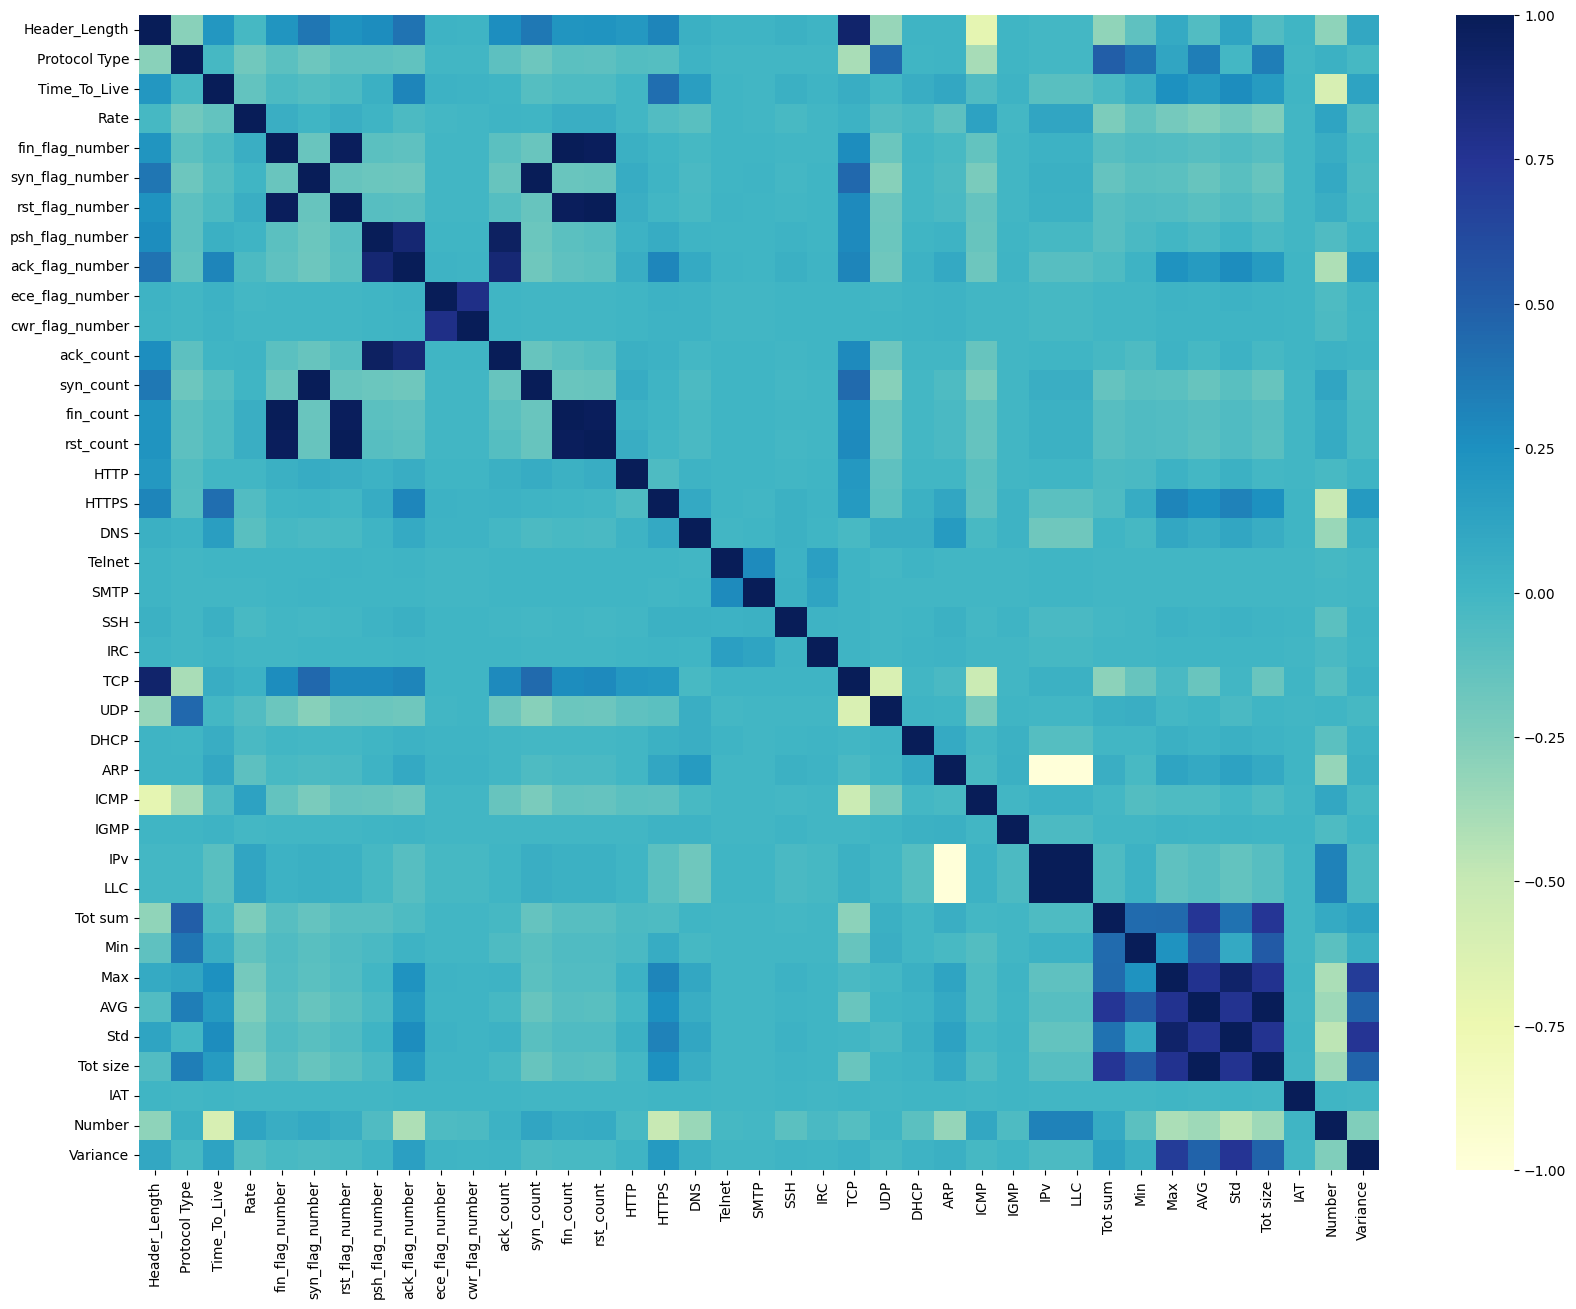

In [ ]:
plt.figure(figsize=(20, 15))
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=False)

plt.show()

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for feature in numerical_features:
    fig = px.histogram(df, x=feature, nbins=50, title=f'Distribution of {feature}', marginal="box")
    fig.show()

NameError: name 'numerical_features' is not defined

In [ ]:
for feature in numerical_features:
    fig = px.box(df, x=target_col, y=feature, color=target_col, title=f'{feature} by {target_col}')
    fig.show()

In [ ]:
protocol_features = ['HTTP','HTTPS','DNS','Telnet','SMTP','SSH','IRC','TCP','UDP','DHCP','ARP','ICMP','IGMP','IPv','LLC']
for feature in protocol_features:
    fig = px.box(df, x=target_col, y=feature, color=target_col, title=f'{feature} by {target_col}')
    fig.show()


In [ ]:
fig = px.histogram(df, x=target_col, color=target_col, title='Count of Labels')
fig.show()